In [4]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlrd

In [12]:
excel_data_df = pd.read_excel('ILCovid.xlsx')
ildf = pd.DataFrame(excel_data_df)
ildf.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Other,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,2020-07-15,IL,157825,34463,26330,49483,4373,228,390,5827,...,1998,1491,346,10,8,52,303,1491,5633,102
1,2020-07-12,IL,155048,33468,25828,48999,4317,226,385,5719,...,1990,1482,343,10,8,52,304,1482,5602,103
2,2020-07-08,IL,150554,31974,25072,48116,4249,225,384,5544,...,1967,1460,337,10,8,51,313,1460,5536,103
3,2020-07-05,IL,148373,31143,24691,47679,4209,224,379,5493,...,1958,1448,329,10,7,48,307,1448,5475,97
4,2020-07-01,IL,144013,30175,24191,46832,4163,219,373,5383,...,1934,1435,327,9,7,48,101,1435,5415,101


In [16]:
# Case by race dataframe
case_by_race_df = ildf[["Date",
                      "Cases_Total",
                      "Cases_LatinX",
                      "Cases_Asian",
                      "Cases_Black",
                      "Cases_White",
                      "Cases_AIAN",
                      "Cases_NHPI",
                       "Cases_Other"]]

# Clean the data by dropping empty row
case_by_race_df = case_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = case_by_race_df.columns.drop("Date")
case_by_race_df[cols] = case_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
case_by_race_df["Date"] = pd.to_datetime(case_by_race_df["Date"]).dt.date

In [21]:
cul_latinx = case_by_race_df["Cases_LatinX"].sum()
cul_asian = case_by_race_df["Cases_Asian"].sum()
cul_black = case_by_race_df["Cases_Black"].sum()
cul_white = case_by_race_df["Cases_White"].sum()
cul_other = case_by_race_df["Cases_Other"].sum()
cul_aian = case_by_race_df["Cases_AIAN"].sum()
cul_nhpi = case_by_race_df["Cases_NHPI"].sum()

(-1.1159478776377725,
 1.128460017936587,
 -1.1129652858913752,
 1.1181114071479594)

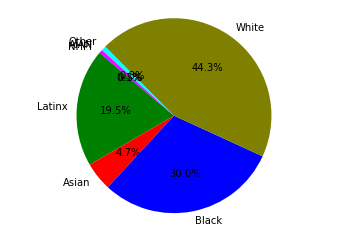

In [27]:
# Labels for the sections of our pie chart
labels = ["Latinx", "Asian", "Black", "White", "Other", "AIAN", "NHPI"]

# The values of each section of the pie chart
sizes = [cul_latinx, cul_asian, cul_black, cul_white, cul_other, cul_aian, cul_nhpi]

# The colors of each section of the pie chart
colors = ["green", "red", "blue", "olive", "cyan", "magenta", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [19]:
# death by race dataframe
death_by_race_df = ildf[["Date",
                      "Deaths_Total",
                      "Deaths_LatinX",
                      "Deaths_Asian",
                      "Deaths_Black",
                      "Deaths_White",
                      "Deaths_AIAN",
                      "Deaths_NHPI",
                       "Deaths_Other"]]

# Clean the data by dropping empty row
death_by_race_df = death_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = death_by_race_df.columns.drop("Date")
death_by_race_df[cols] = death_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
death_by_race_df["Date"] = pd.to_datetime(death_by_race_df["Date"]).dt.date

In [22]:
cul_latinx = death_by_race_df["Deaths_LatinX"].sum()
cul_asian = death_by_race_df["Deaths_Asian"].sum()
cul_black = death_by_race_df["Deaths_Black"].sum()
cul_white = death_by_race_df["Deaths_White"].sum()
cul_other = death_by_race_df["Deaths_Other"].sum()
cul_aian = death_by_race_df["Deaths_AIAN"].sum()
cul_nhpi = death_by_race_df["Deaths_NHPI"].sum()

(-1.1159478776377725,
 1.128460017936587,
 -1.1129652858913752,
 1.1181114071479594)

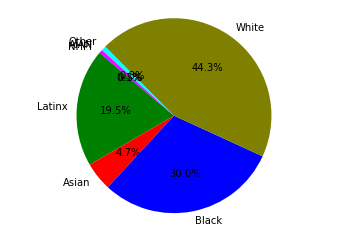

In [23]:
# Labels for the sections of our pie chart
labels = ["Latinx", "Asian", "Black", "White", "Other", "AIAN", "NHPI"]

# The values of each section of the pie chart
sizes = [cul_latinx, cul_asian, cul_black, cul_white, cul_other, cul_aian, cul_nhpi]

# The colors of each section of the pie chart
colors = ["green", "red", "blue", "olive", "cyan", "magenta", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")